# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/data/15061057/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2015년~)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
# 한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.
# 수치계산을 위해 numpy를 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터시각화를 위한 폰트설정

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

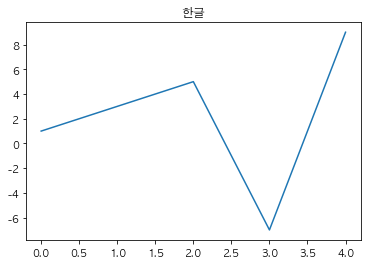

In [3]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [118]:
import glob
glob.glob("data/*.csv")

['data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data/seoul-covid19-2021-12-26.csv',
 'data/seoul-covid19-2021-12-18.csv']

In [5]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.

df_last = pd.read_csv(r'data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv', encoding="cp949")
df_last.shape

(6120, 5)

In [6]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.
df_last.head(2)

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652


In [7]:
# tail 로도 미리보기를 합니다.
df_last.tail(2)

,지역명,규모구분,연도,월,분양가격
6118,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,9,NaN
6119,제주,전용면적 102제곱미터초과,2021,9,7727


### 2013년 9월부터 2015년 8월까지
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [8]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.
import glob
glob.glob("data/*")

['data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data/seoul-covid19-2021-12-26.csv',
 'data/seoul-covid19-2021-12-18.csv']

In [9]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="cp949")
df_first.shape

(17, 22)

In [10]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [11]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.
df_first.tail(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [12]:
# info 로 요약합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     6120 non-null   object
 1   규모구분    6120 non-null   object
 2   연도      6120 non-null   int64 
 3   월       6120 non-null   int64 
 4   분양가격    5641 non-null   object
dtypes: int64(2), object(3)
memory usage: 239.2+ KB


In [13]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [14]:
True == 1

True

In [15]:
# isnull 을 통해 결측치를 봅니다.
df_last.isnull()

,지역명,규모구분,연도,월,분양가격
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6115,False,False,False,False,False
6116,False,False,False,False,True
6117,False,False,False,False,False
6118,False,False,False,False,True


In [16]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [120]:
# isna 를 통해 결측치를 구합니다.
df_last.isna().sum()

지역명         0
연도          0
월           0
평당분양가격    495
전용면적        0
dtype: int64

In [121]:
df_last.isna().mean()

지역명       0.000000
연도        0.000000
월         0.000000
평당분양가격    0.080882
전용면적      0.000000
dtype: float64

<AxesSubplot:>

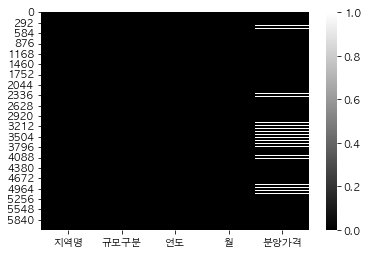

In [18]:
sns.heatmap(df_last.isnull(), cmap="gray")

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [28]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격"], errors='coerce')
df_last["분양가격"].tail()

6115    8356.0
6116       NaN
6117    8410.0
6118       NaN
6119    7727.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [30]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

### 분양가격 요약하기

In [47]:
pd.Series([1, 3, 5, 7.0, "", 9]).replace("", np.nan).astype(float)

0    1.0
1    3.0
2    5.0
3    7.0
4    NaN
5    9.0
dtype: float64

In [41]:
# info를 통해 분양가격을 봅니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 287.0+ KB


In [34]:
df_last["분양가격"].mean()

3459.3178666666668

In [33]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.

df_last["분양가격"].describe()

count     5625.000000
mean      3459.317867
std       1411.776054
min       1868.000000
25%       2574.000000
50%       3067.000000
75%       3922.000000
max      13835.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [49]:
# 규모구분의 unique 값 보기

df_last["규모구분"].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [61]:
# 규모구분을 전용면적으로 변경하기
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터|이하| ", "", regex=True)
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last[["규모구분", "전용면적"]].head(5)

,규모구분,전용면적
0,모든면적,모든면적
1,전용면적 60제곱미터이하,60
2,전용면적 60제곱미터초과 85제곱미터이하,60~85
3,전용면적 85제곱미터초과 102제곱미터이하,85~102
4,전용면적 102제곱미터초과,102~


### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [63]:
# info로 정보 보기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
 6   전용면적    6120 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 334.8+ KB


In [ ]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열

df_last = df_last.drop(labels=["규모구분", "분양가격"], axis=1)

In [67]:
# 제거가 잘 되었는지 확인 합니다.

df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


In [68]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   연도      6120 non-null   int64  
 2   월       6120 non-null   int64  
 3   평당분양가격  5625 non-null   float64
 4   전용면적    6120 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


## 최근 데이터 시각화 하기

### 수치데이터 히스토그램 그리기

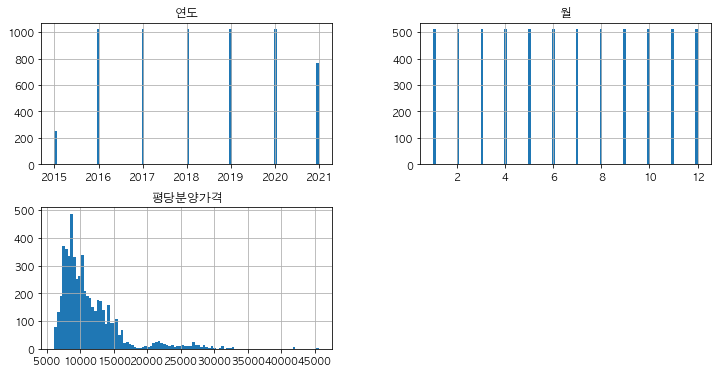

In [74]:
# df_last.hist()

_ = df_last.hist(figsize=(12, 6), bins=100)

In [ ]:
df_last[df_last["지역명"].isin(["서울", "경기", "인천"])]

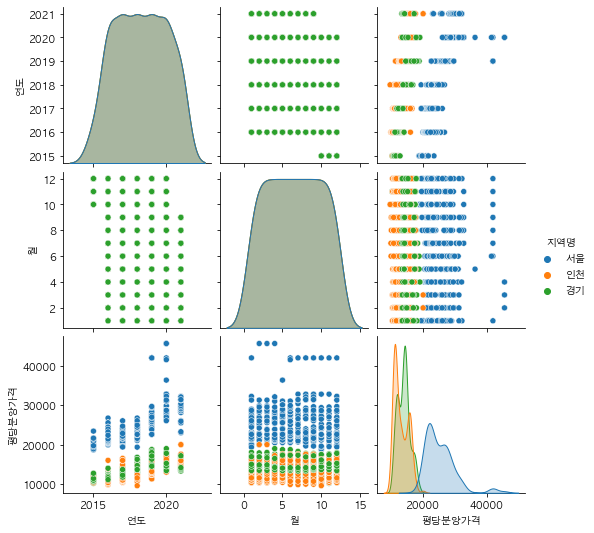

In [80]:
# pairplot

sns.pairplot(data=df_last[df_last["지역명"].isin(["서울", "경기", "인천"])], hue="지역명")

## 2015년 8월 이전 데이터 보기

In [89]:
# 모든 컬럼이 출력되게 설정합니다.
pd.options.display.max_columns = None

In [91]:
# head 로 미리보기를 합니다.

df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [92]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [94]:
# 결측치가 있는지 봅니다.

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png" width="500">

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [95]:
# head 로 미리보기 합니다.

df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [98]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 


df_first_melt = pd.melt(df_first, id_vars=["지역"])
df_first_melt.head(2)

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [100]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(2)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [101]:
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적


In [102]:
date = "2013년12월"
date

'2013년12월'

In [108]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.

date.split("년")

['2013', '12월']

In [109]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

date.split("년")[0]

'2013'

In [110]:
int(date.split("년")[0])

2013

In [127]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

int(date.split("년")[-1].replace("월", ""))

12

In [128]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date):
    return int(date.split("년")[0])

In [129]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.

parse_year(date)

2013

In [124]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_month(date):
    return int(date.split("년")[-1].replace("월", ""))

In [125]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [131]:
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적


In [132]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)

In [ ]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head()

In [146]:
df_first_melt["연도"] = df_first_melt["기간"].str.split(
    "년", expand=True)[0].astype(int)

In [145]:
df_first_melt["월"] = df_first_melt["기간"].str.split(
    "년", expand=True)[1].str.replace("월", "").astype(int)

0      12
1      12
2      12
3      12
4      12
       ..
352     8
353     8
354     8
355     8
356     8
Name: 1, Length: 357, dtype: int64

In [148]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.
df_last.columns.tolist()

['지역명', '연도', '월', '평당분양가격', '전용면적']

In [150]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [151]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [158]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

df_last_prepare = df_last.loc[df_last["전용면적"] == "모든면적", cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [162]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt.loc[:, cols].copy()
df_first_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


### concat 으로 데이터 합치기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [165]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.
df = pd.concat([df_first_prepare, df_last_prepare])

In [ ]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df

In [168]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df["연도"].value_counts().sort_index()

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020    204
2021    153
Name: 연도, dtype: int64

## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

<AxesSubplot:xlabel='지역명'>

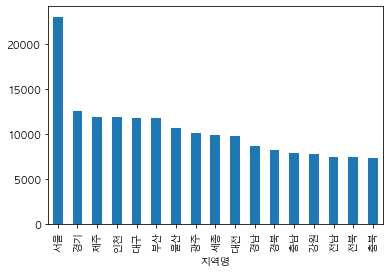

In [177]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

df.groupby(by=["지역명"])["평당분양가격"].mean(
).sort_values(ascending=False).plot(kind="bar")

In [187]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

year_local = df.groupby(by=["연도", "지역명"])["평당분양가격"].mean().unstack()
year_local

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.000000,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.250000,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.600000,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.500000,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7170.625000,11840.675000,8163.925000,7802.575000,9471.000000,11507.100000,9056.025000,11663.575000,21425.250000,9133.025000,11327.525000,10749.475000,7245.700000,7074.650000,10907.325000,7455.800000,6770.225000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.350000,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.050000,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000
2020,9331.300000,14383.325000,10160.700000,9544.975000,12500.125000,15145.075000,11094.050000,13247.575000,26910.125000,11355.300000,12202.850000,14674.000000,8696.875000,8317.100000,14540.900000,8856.100000,7959.600000
2021,9651.766667,14093.933333,10386.566667,10261.533333,13937.733333,15487.266667,11761.200000,14352.066667,29301.433333,12540.000000,14272.500000,15103.733333,9966.366667,8784.600000,23790.800000,9264.566667,8634.633333


<AxesSubplot:xlabel='연도'>

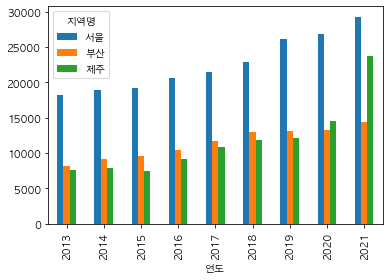

In [189]:
year_local[["서울", "부산", "제주"]].plot.bar()

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [191]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.

df.pivot_table(index="지역명", values="평당분양가격")

,평당분양가격
지역명,
강원,7701.655914
경기,12477.155914
경남,8661.929032
경북,8163.291398
광주,10114.936559
대구,11799.490323
대전,9779.794624
부산,11729.804301
서울,22991.492473


In [ ]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df.groupby(["연도", "지역명"])["평당분양가격"].mean()

In [204]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.

year_region = df.pivot_table(index="연도", columns="지역명", values="평당분양가격")
year_region.round(0)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7171.0,11841.0,8164.0,7803.0,9471.0,11507.0,9056.0,11664.0,21425.0,9133.0,11328.0,10749.0,7246.0,7075.0,10907.0,7456.0,6770.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9652.0,14094.0,10387.0,10262.0,13938.0,15487.0,11761.0,14352.0,29301.0,12540.0,14272.0,15104.0,9966.0,8785.0,23791.0,9265.0,8635.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

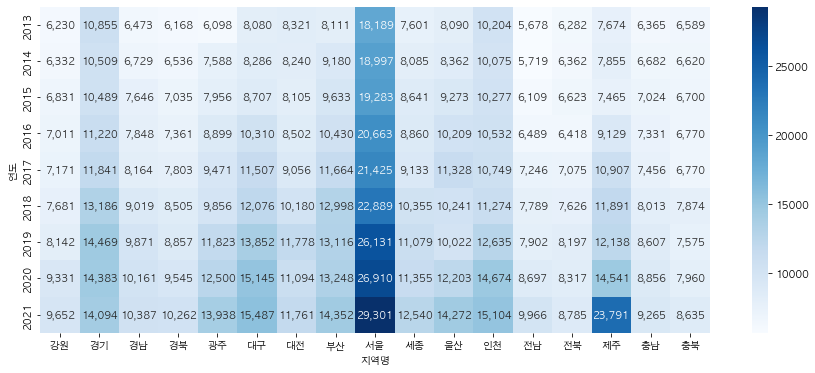

In [201]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.

plt.figure(figsize=(15, 6))
sns.heatmap(year_region, cmap="Blues", annot=True, fmt=",.0f")

<AxesSubplot:xlabel='연도', ylabel='지역명'>

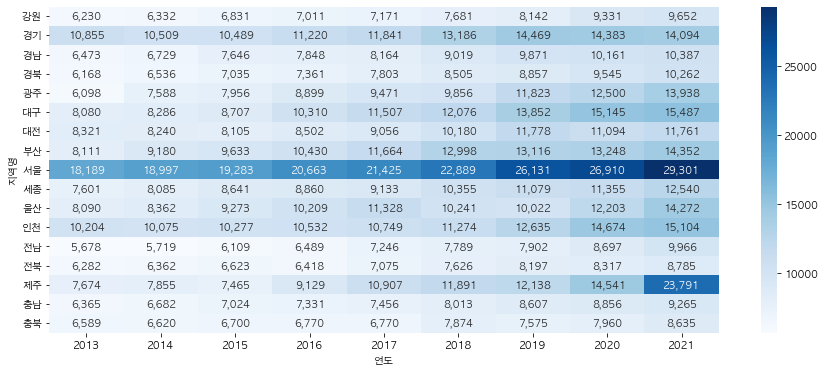

In [202]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

plt.figure(figsize=(15, 6))
sns.heatmap(year_region.T, cmap="Blues", annot=True, fmt=",.0f")

In [ ]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.



## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

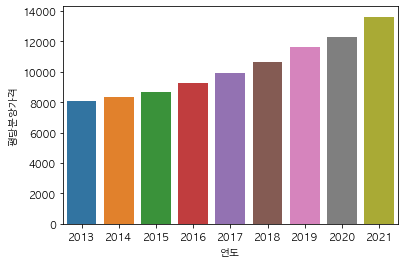

In [206]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

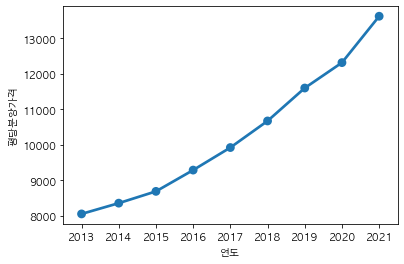

In [207]:
# pointplot 으로 연도별 평당분양가격 그리기

sns.pointplot(data=df, x="연도", y="평당분양가격", ci=None)

In [210]:
# sns.lineplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

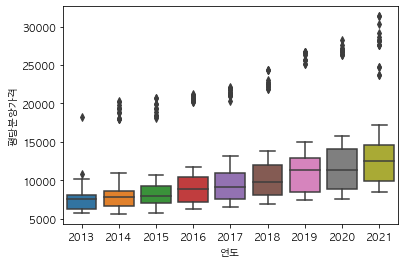

In [211]:
# 연도별 평당분양가격 boxplot 그리기

sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

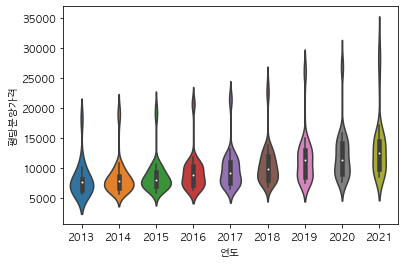

In [212]:
# 연도별 평당분양가격 violinplot 그리기

sns.violinplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

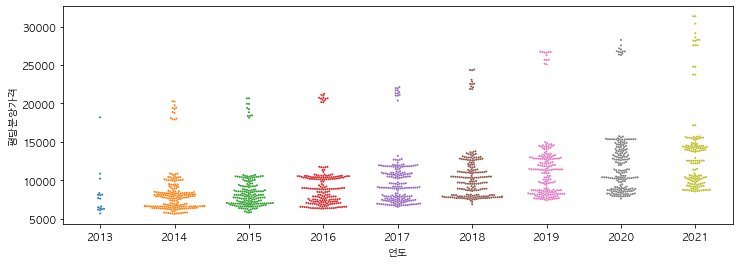

In [215]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x="연도", y="평당분양가격", size=2)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

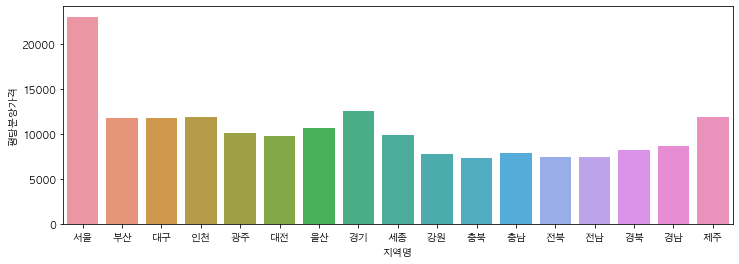

In [218]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

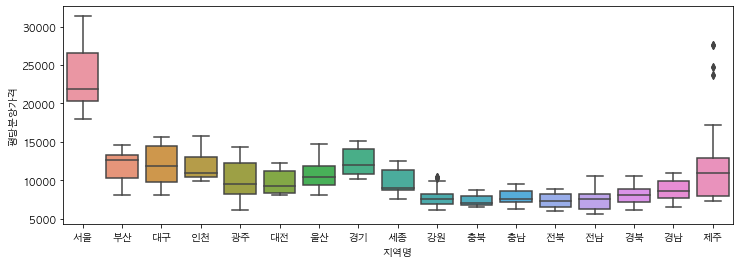

In [220]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

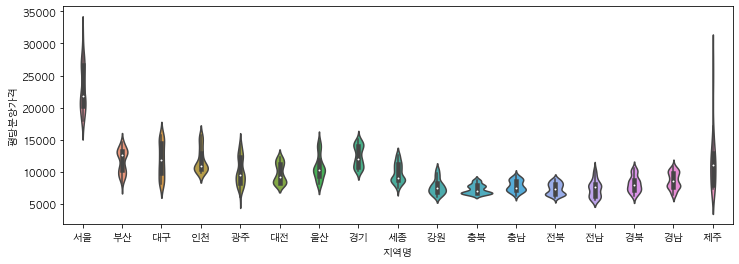

In [221]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(12, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

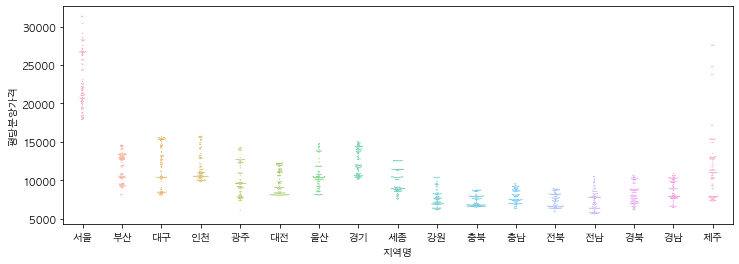

In [224]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", size=1)